## Project Milestone 2

This project is a part of the analysis of the movies data set

In [443]:
import numpy
import pandas as pd
import json
import matplotlib.pyplot as plt
import pycountry
KEYWORDS = [ "Terrorism", "Terrorist", "Terrorists", "Jihad", "Extremism", "Extremist", "Attacks", "Attack", "Bombs", "Bombing", "Bombers", "Hijack", "Hijacking", "Kidnap", "Kidnapping", "Counterterrorism", "Counterterrorist", "Radicalization", "Radicalized", "Security Threat", "Political Violence", "Suicide Bomber", "War on Terror", "Homeland Security", "National Security", "Intelligence Agencies", "Counterinsurgency", "Terrorist Cells", "Radical Ideology", "Terrorist Plot", "Terrorist Organization", "Hostage Crisis", "Terrorism Investigation", "Counterterrorist Operation", "Radical", "Guerrilla Warfare", "Insurgency", "Terror Threat", "Covert Operations", "Political Unrest", "Martyrdom", "Cyberterrorism", "Terrorism Financing", "Violent Extremism", "Terrorist Recruitment", "Suicide Attacks", "Terrorist Sleeper Cells", "Counterterror Measures", "Clandestine Activities", "Security Intelligence" ]


## Research Question

### Are there noticeable topics patterns in terrorism movies? If so, do different countries/regions differ in the specific topics/patterns of their cinematic representation of terrorism?


# 1. Data Preprocessing

### 1.1 Import Data

In [444]:
plot_path= 'data/plot_summaries.txt'
movie_metadata_path = 'data/movie.metadata.tsv'

In [445]:

m_column_names = ['wikipediaID', 'F_movie ID', 'Movie name', 'Release date', 'Box office revenue', 'Runtime', 'Languages', 'Countries', 'Genres']
m_data = pd.read_csv('data/movie.metadata.tsv', delimiter= '\t',on_bad_lines='skip', names=m_column_names, header=0)

### 1.2 Filter Terrorism-Related Movies and Other Movies

In [446]:
# Read the text file into a DataFrame
m_plot = pd.read_csv(plot_path, delimiter='\t', header= None)

# Define list of keywords
movie_ids=[]
# Create a new column in the DataFrame to store the count of keywords in each movie plot
for index, row in m_plot.iterrows():
    movie_id = row[0]
    plot = row[1]
    # Check if the plot contains any of the keywords
    for keyword in KEYWORDS:
        if keyword.lower() in plot:
            movie_ids.append(movie_id)

# Display the list of movie IDs that match the keywords
movie_ids= set(movie_ids)

In [447]:
df = pd.DataFrame(m_plot)
df_plot = df.rename(columns={0: 'wikipediaID', 1: 'summary'})

In [448]:
terrorism_movies = m_data[m_data['wikipediaID'].isin(movie_ids)][['wikipediaID','Movie name', 'Release date','Countries', 'Languages', 'Genres','Box office revenue']]

In [449]:
df_for_topics = pd.merge(terrorism_movies, df_plot, on='wikipediaID', how='inner')
df_for_topics.drop('Box office revenue', axis =1, inplace=True)
df_for_topics.head(100)


,wikipediaID,Movie name,Release date,Countries,Languages,Genres,summary
0,9633533,Vandanam,1989,"{""/m/03rk0"": ""India""}","{""/m/0999q"": ""Malayalam Language""}","{""/m/02kdv5l"": ""Action""}","Professor Kurian Fernandez , a convict escapes..."
1,261237,The Gods Must Be Crazy,1980,"{""/m/0hzlz"": ""South Africa""}","{""/m/0x82"": ""Afrikaans Language"", ""/m/02h40lc""...","{""/m/03k9fj"": ""Adventure"", ""/m/03btsm8"": ""Acti...",The film is a collision of three separate stor...
2,4951456,Kinjite: Forbidden Subjects,1989,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/03btsm8"": ""A...",A Japanese businessman sees a woman being grop...
3,32104837,It Came Upon the Midnight Clear,1984-12-15,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...","The film centers on Mike Halligan, a retired c..."
4,2647998,The Human Tornado,1976,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hj3l_y...","After coming off a successful comedy tour, Dol..."
...,...,...,...,...,...,...,...
95,9943176,The Fighting Sullivans,1944,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/02h8pkk...","The Irish-American, Catholic Sullivan brothers..."
96,3972416,Robot Taekwon V,1976-07-24,"{""/m/06qd3"": ""South Korea""}","{""/m/02hwhyv"": ""Korean Language""}","{""/m/02kdv5l"": ""Action""}","Dr. Kaff , an evil scientist bent on world dom..."
97,803276,Gwendoline,1984-02-08,"{""/m/0f8l9c"": ""France""}","{""/m/064_8sq"": ""French Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/03q4nz"": ""World ...","Captured by a trio of thieves, Gwendoline is s..."
98,3432108,Eye of the Tiger,1986-11-28,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/0hj3mwf"": ""B...","After a long stint in prison Buck Matthews , a..."


In [450]:
# Check for NaN values in the DataFrame
nan_values = df_for_topics.isnull().values.any()
print(nan_values)
null_count = df_for_topics['Release date'].isnull().sum()
print('Null Count Date ',null_count)
null_count_countries = df_for_topics['Movie name'].isnull().sum()
print('Null Count Countries' ,null_count_countries)
df_for_topics.shape[0]

True
Null Count Date  337
Null Count Countries 0


8626

In [451]:
# According to the number of values with empty date remove the rows with null date
df_for_topics.dropna(subset=['Release date'], inplace=True)

In [452]:
def extract_year(date_string):
    return date_string.split('-')[0] if '-' in date_string else date_string

In [453]:
df_for_topics['Release date'] = df_for_topics['Release date'].apply(extract_year)
df_for_topics.head(10)

,wikipediaID,Movie name,Release date,Countries,Languages,Genres,summary
0,9633533,Vandanam,1989,"{""/m/03rk0"": ""India""}","{""/m/0999q"": ""Malayalam Language""}","{""/m/02kdv5l"": ""Action""}","Professor Kurian Fernandez , a convict escapes..."
1,261237,The Gods Must Be Crazy,1980,"{""/m/0hzlz"": ""South Africa""}","{""/m/0x82"": ""Afrikaans Language"", ""/m/02h40lc""...","{""/m/03k9fj"": ""Adventure"", ""/m/03btsm8"": ""Acti...",The film is a collision of three separate stor...
2,4951456,Kinjite: Forbidden Subjects,1989,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/03btsm8"": ""A...",A Japanese businessman sees a woman being grop...
3,32104837,It Came Upon the Midnight Clear,1984,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...","The film centers on Mike Halligan, a retired c..."
4,2647998,The Human Tornado,1976,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hj3l_y...","After coming off a successful comedy tour, Dol..."
5,273431,Terrorama,2001,"{""/m/059j2"": ""Netherlands""}","{""/m/02bv9"": ""Dutch Language""}","{""/m/07s9rl0"": ""Drama"", ""/m/01z4y"": ""Comedy""}","The film tells the story of six mental cases, ..."
6,19929835,Aftershock: Beyond the Civil War,2007,"{""/m/09c7w0"": ""United States of America""}",{},"{""/m/0jtdp"": ""Documentary""}",The film is about the harsh period of Reconstr...
7,5894429,Closing the Ring,2007,"{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/02h40lc"": ""English Language""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...","The film opens in 1991, with the funeral of a ..."
8,4300418,The Hero: Love Story of a Spy,2003,"{""/m/03rk0"": ""India""}","{""/m/03k50"": ""Hindi Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/0cq22f9"": ""Actio...",Arun Sharma is a spy working for RAW . He set...
9,3740032,Desperate,1947,"{""/m/09c7w0"": ""United States of America""}","{""/m/02h40lc"": ""English Language""}","{""/m/02xh1"": ""Film noir""}",Steve Randall is an independent trucker who i...


In this section we remove all rows containing null values for Countries as I will be an essential tool in our computation

In [454]:
# checks if ts an empty json
def is_empty_json(json_str):
    try:
        json_obj = json.loads(json_str)
        return isinstance(json_obj, dict) and not bool(json_obj)
    except (json.JSONDecodeError, TypeError):
        return False

In [455]:
contains_empty_json = df_for_topics['Countries'].apply(is_empty_json)
filtered_df_for_topics = df_for_topics[~contains_empty_json]
filtered_df_for_topics.shape[0]

7934

## 2. Data Wrangling

Now we want to see how many different countries we can find in our data set in order to check if we can classify the movies per country

In [456]:
df = filtered_df_for_topics
def extract_countries(json_str):
    countries = set()
    try:
        json_obj = json.loads(json_str)
        for country in json_obj.values():
            countries.add(country)
    except (json.JSONDecodeError, TypeError):
        pass
    return countries

unique_countries = []



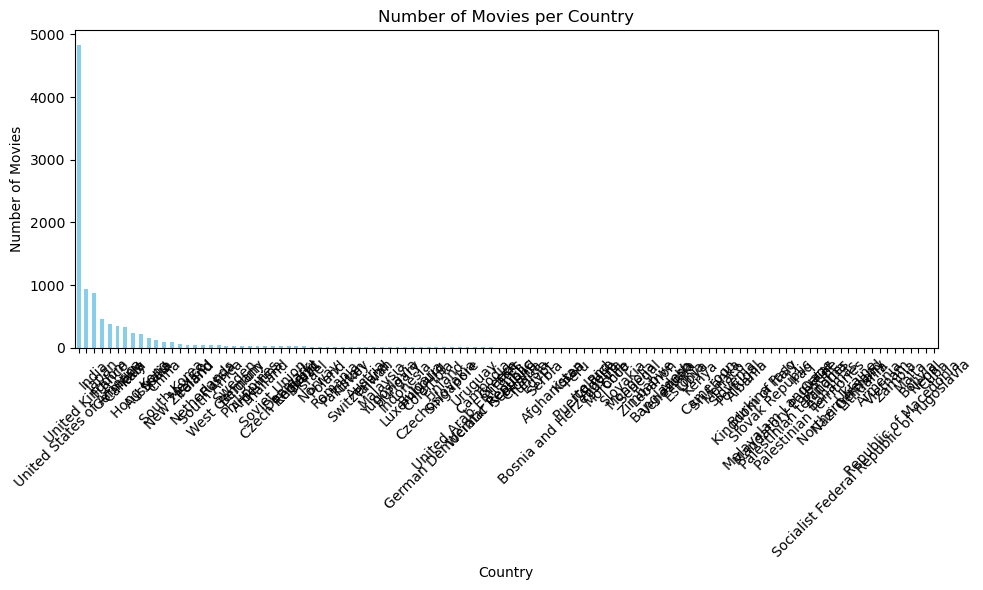

In [457]:
for countries_str in df['Countries']:
    unique_countries.extend(extract_countries(countries_str))
# Count the occurrences of each country
country_counts = pd.Series(unique_countries).value_counts()
# Plotting
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [458]:
df_regions = pd.read_excel('data/Countries_Region.xlsx')


In [459]:
dfs = []
new_df_regions = pd.DataFrame(['Country, Region'])
for i in df_regions.columns:
    region_name = i
    # Create a DataFrame for each region with 'Country' and 'Region' columns
    temp_df = pd.DataFrame({'Country': df_regions[i].dropna(), 'Region': region_name})
    
    # Append each region DataFrame to the list
    dfs.append(temp_df)
new_df_regions = pd.concat(dfs, ignore_index=True)
new_df_regions

,Country,Region
0,Angola,Africa
1,Benin,Africa
2,Botswana,Africa
3,Burkina Faso,Africa
4,Burundi,Africa
...,...,...
191,Rep.​of North Macedonia,​Europ Region
192,Turkey,​Europ Region
193,Ukraine,​Europ Region
194,United Kingdom,​Europ Region


In [460]:

# List of corrected column names you want to retrieve unique values from
# Extract unique values from the renamed columns
countries_list = []
for column in df_regions.columns:
        print(column)
        countries_list.extend(df_regions[column].unique().tolist())



# Display the list of unique countries
print("List of unique countries:")
print(countries_list)


Africa
America
​Arab States
Asia and Pacific
Cis
​Europ Region
List of unique countries:
['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cabo Verde', 'Central African Rep.', 'Chad', 'Congo (Rep. of the)\xa0', "Côte d'Ivoire", 'Dem. Rep. of the Congo)', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', nan, 'Antigua\xa0and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Rep.', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', '

In [461]:
# Check for countries not present in 'unique_countries_list'
unique_countries = set(unique_countries)
countries_not_in_list = [country for country in unique_countries if country not in countries_list]

# Display the list of countries not contained in the 'unique_countries_list'
print("Countries not contained in the unique list:")
print(countries_not_in_list)
print(len(countries_not_in_list))

Countries not contained in the unique list:
['United States of America', 'West Germany', 'Scotland', 'Monaco', 'Soviet Union', 'Nazi Germany', 'Palestinian Territories', 'England', 'Puerto Rico', 'Vietnam', 'Hong Kong', 'Mandatory Palestine', 'Bolivia', 'Republic of Macedonia', 'German Democratic Republic', 'Northern Ireland', 'Taiwan', 'Weimar Republic', 'Nepal', 'Iran', 'Aruba', 'Kingdom of Italy', 'Russia', 'Yugoslavia', 'Socialist Federal Republic of Yugoslavia', 'Korea', 'Slovak Republic', 'Malayalam Language', 'Czechoslovakia', 'South Korea', 'Palestinian territories']
31


In [462]:
country_to_region = {
    'United States of America': 'America',
    'West Germany': '​Europ Region',
    'Scotland': '​Europ Region',
    'Taiwan': 'Asia and Pacific',
    'South Korea': 'Asia and Pacific',
    'Monaco': '​Europ Region',
    'Weimar Republic': '​Europ Region',
    'Nepal': 'Asia and Pacific',
    'Iran': '​Arab States',
    'Soviet Union': 'Cis',
    'Nazi Germany': '​Europ Region',
    'Aruba': 'America',
    'Kingdom of Italy': '​Europ Region',
    'Palestinian Territories': '​Arab States',
    'Russia': 'Cis',
    'England': '​Europ Region',
    'Yugoslavia': '​Europ Region',
    'Puerto Rico': 'America',
    'Palestinian territories': '​Arab States',
    'Vietnam': 'Asia and Pacific',
    'Hong Kong': 'Asia and Pacific',
    'Socialist Federal Republic of Yugoslavia': '​Europ Region',
    'Bolivia': 'America',
    'Korea': 'Asia and Pacific',
    'Slovak Republic': '​Europ Region',
    'Malayalam Language': 'Asia and Pacific',
    'Republic of Macedonia': '​Europ Region',
    'Czechoslovakia': '​Europ Region',
    'Mandatory Palestine': '​Arab States',
    'German Democratic Republic': '​Europ Region',
    'Northern Ireland': '​Europ Region'
}

In [463]:
country_to_region_df = pd.DataFrame(country_to_region.items(), columns=['Country', 'Region'])
final_df_regions = pd.concat([country_to_region_df, new_df_regions], ignore_index=True)

In [464]:
def extract_countries_from_json(json_string):
    try:
        countries_dict = json.loads(json_string)
        # Extract country names from the values in the dictionary
        country_names = [value for value in countries_dict.values()]
        return country_names
    except (json.JSONDecodeError, KeyError):
        return []

In [465]:
filtered_df_for_topics['Country_extract'] = filtered_df_for_topics['Countries'].apply(extract_countries_from_json)

/var/folders/67/6c4p9l3d6gz7mdpq5tr7rk7w0000gn/T/ipykernel_79761/371166071.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [466]:
def map_region(country_list):
    return final_df_regions[final_df_regions['Country'].isin(country_list)]['Region'].tolist()

# Apply the function to create a new column 'Region' in filtered_df_for_topics
filtered_df_for_topics['Region'] = filtered_df_for_topics['Country_extract'].apply(map_region)




/var/folders/67/6c4p9l3d6gz7mdpq5tr7rk7w0000gn/T/ipykernel_79761/2512808961.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



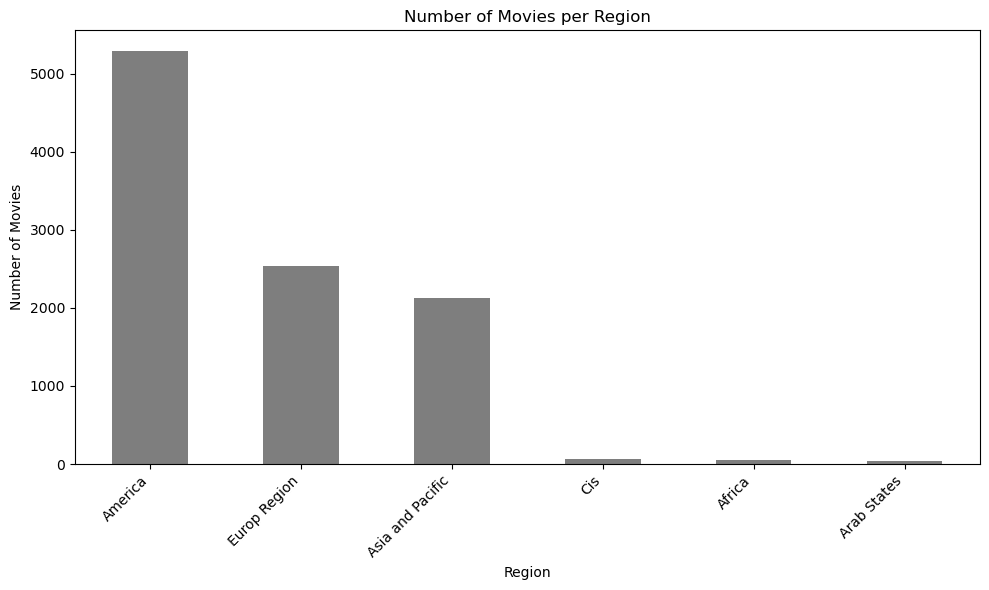

In [467]:
flattened_regions = filtered_df_for_topics['Region'].explode()
movies_per_region = flattened_regions.value_counts()
# Plot the number of movies per region
plt.figure(figsize=(10, 6))
movies_per_region.plot(kind='bar', color='#7e7e7e')
plt.title('Number of Movies per Region')
plt.xlabel('Region')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

- Basic Statistics: Calculate summary statistics for relevant columns such as release dates, number of movies per country/region, etc.
- Topic Modeling Preparation: Prepare the movie summaries for topic modeling by tokenizing, vectorizing, and pre-processing the text data using techniques like TF-IDF or word embeddings.
- Visualizations: to explore the distribution of movies across countries/regions, genres, and other relevant features.
- plot number of movies per region avec la chronologie
- par pays dans chaque region :)

In [468]:
print("Count of movies per region:")
print(movies_per_region)

Count of movies per region:
America             5292
​Europ Region       2538
Asia and Pacific    2121
Cis                   67
Africa                48
​Arab States          34
Name: Region, dtype: int64


In [495]:
import plotly.express as px

# Sort the DataFrame by 'Release date'

exploded_df = filtered_df_for_topics.explode('Region').sort_values('Release date')
exploded_df['Release date'] = pd.to_datetime(exploded_df['Release date']).dt.year

# Create a DataFrame suitable for Plotly
plotly_df = exploded_df.groupby(['Region', 'Release date']).size().reset_index(name='Number of Movies')
# Interactive Plot
fig = px.line(plotly_df, x='Release date', y='Number of Movies', color='Region',
              title='Interactive Plot of Movies per Year for Each Region',
              labels={'Release date': 'Release Year', 'Number of Movies': 'Count'})

fig.update_xaxes(rangeslider_visible=True)
fig.show()


0      1975
1      1977
2      1978
3      1980
4      1985
       ... 
351    2009
352    2010
353    2011
354    2012
355    2013
Name: Release date, Length: 356, dtype: int64


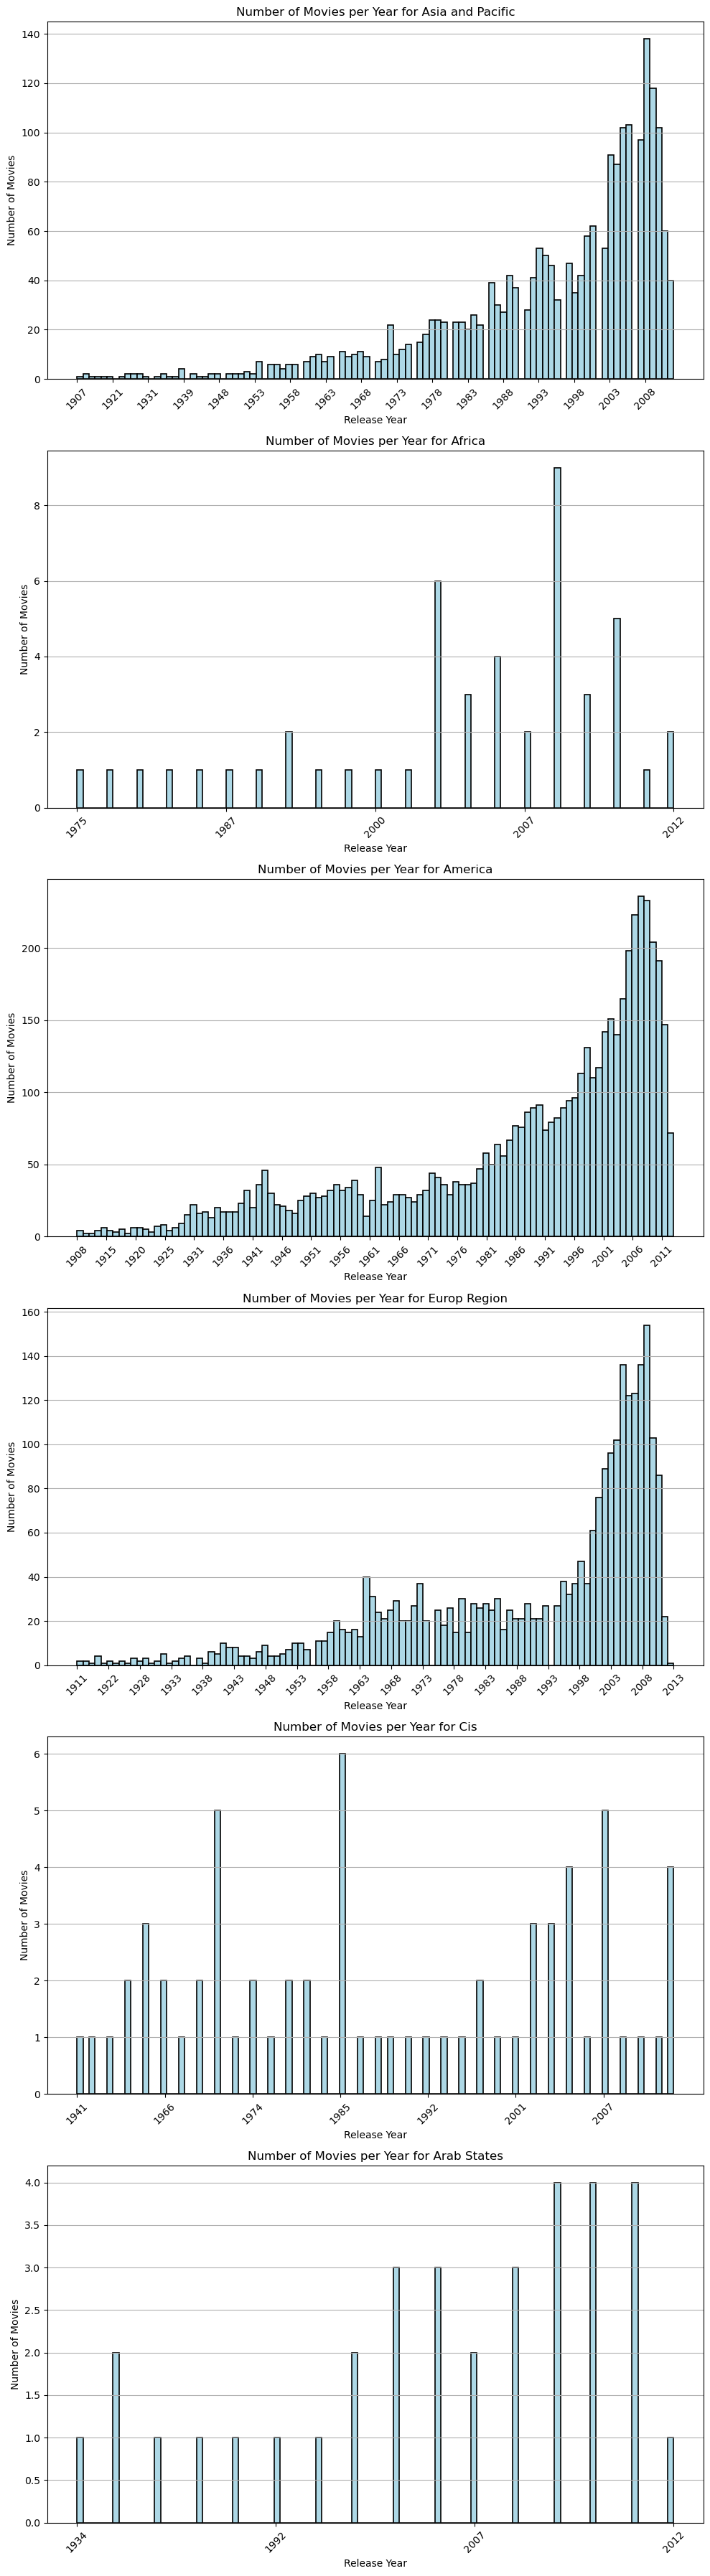

In [476]:
# Group by 'Region' and 'Release date', count movies for each region in each year


movies_per_year_per_region = (exploded_df.groupby(['Region', 'Release date'])
                                        .size()
                                        .unstack(fill_value=0))
unique_regions = exploded_df['Region'].unique()
fig, axes = plt.subplots(nrows=len(unique_regions), figsize=(10, 6 * len(unique_regions)))


for i, region in enumerate(unique_regions):
    # Select data for the current region
    region_data = exploded_df[exploded_df['Region'] == region]['Release date'].sort_values()
    axes[i].hist(region_data, bins=100, linewidth=1.2, edgecolor='black', color='lightblue')
    axes[i].set_xlabel('Release Year')
    axes[i].set_ylabel('Number of Movies')
    axes[i].set_title(f'Number of Movies per Year for {region}')
    axes[i].set_xticks(axes[i].get_xticks()[::5])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()
    
   
